In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# from sympy import symbols, Eq, Function, dsolve
from numpy import positive
from sympy import *

eta_h, eta_r, eta_y_1, eta_y_2 = 1, 1, 1, 1

eta_h, eta_r, eta_y_1, eta_y_2 = symbols("eta_h eta_r eta_y_1 eta_y_2", constant=True)

l_1, l_2 = symbols("l_1 l_2", cls=Function)

t = symbols("t")

eqs = [
    Eq(
        l_1(t).diff(t),
        -(eta_h + eta_y_1) * l_1(t) - eta_h * l_2(t),
    ),
    Eq(
        l_2(t).diff(t),
        -eta_h * l_1(t) - (eta_h + eta_r + eta_y_2) * l_2(t),
    ),
]

l_1, l_2 = dsolve(eqs, [l_1(t), l_2(t)])
l_1, l_2 = l_1.rhs, l_2.rhs

In [3]:
A = -1 * Matrix([[eta_h + eta_y_1, eta_h], [eta_h, eta_h + eta_r + eta_y_2]])
U, D = A.diagonalize()

In [4]:
X = U * D * U.inv()
X.simplify()
X

Matrix([
[-eta_h - eta_y_1,                   -eta_h],
[          -eta_h, -eta_h - eta_r - eta_y_2]])

In [5]:
l_1_0, l_2_0, b_r_0 = symbols("l_1_0 l_2_0 b_r_0", constant=True)

eqs = [Eq(l_1_0, l_1.subs(t, 0)), Eq(l_2_0, l_2.subs(t, 0))]
sol = solve(eqs, "C1", "C2")
C_1, C_2 = sol.values()
(
    C_1,
    C_2,
) = simplify(
    C_1
), simplify(C_2)

In [6]:
y_1_target, y_2_target = symbols("y_1_target y_2_target", constant=True)

C_1 = C_1.subs([(l_1_0, y_1_target), (l_2_0, y_2_target)])
C_2 = C_2.subs([(l_1_0, y_1_target), (l_2_0, y_2_target)])

b_r_0 = 0

In [7]:
b_r = -eta_r * integrate(l_2, t)
b_r = simplify(b_r)
b_r = b_r.subs([("C1", C_1), ("C2", C_2)])
b_r = Add(b_r, b_r_0 - b_r.subs(t, 0))

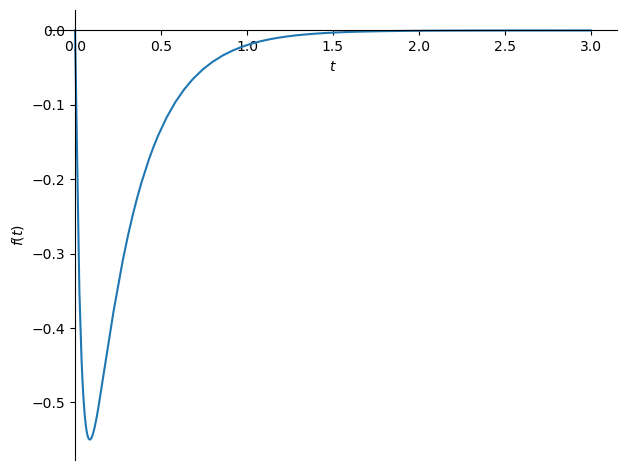

In [8]:
b_r_plot = b_r.subs(
    [
        (eta_h, 10),
        (eta_r, 10),
        (eta_y_1, 0),
        (eta_y_2, 0),
        (y_1_target, 2),
        (y_2_target, 2),
    ]
)
plot(b_r_plot, (t, 0, 3))

In [9]:
# b_r = b_r.subs([(y_2_target, y_1_target)])

In [10]:
b_r

-Piecewise((2*eta_r*(eta_h*(2*eta_h + eta_r + eta_y_1 + eta_y_2 + sqrt(4*eta_h**2 + eta_r**2 - 2*eta_r*eta_y_1 + 2*eta_r*eta_y_2 + eta_y_1**2 - 2*eta_y_1*eta_y_2 + eta_y_2**2))*(2*eta_h**3*y_2_target - 3*eta_h**2*eta_r*y_1_target + 3*eta_h**2*eta_y_1*y_1_target - 3*eta_h**2*eta_y_2*y_1_target - eta_h**2*y_1_target*sqrt(4*eta_h**2 + eta_r**2 - 2*eta_r*eta_y_1 + 2*eta_r*eta_y_2 + eta_y_1**2 - 2*eta_y_1*eta_y_2 + eta_y_2**2) + eta_h*eta_r**2*y_2_target - 2*eta_h*eta_r*eta_y_1*y_2_target + 2*eta_h*eta_r*eta_y_2*y_2_target + eta_h*eta_r*y_2_target*sqrt(4*eta_h**2 + eta_r**2 - 2*eta_r*eta_y_1 + 2*eta_r*eta_y_2 + eta_y_1**2 - 2*eta_y_1*eta_y_2 + eta_y_2**2) + eta_h*eta_y_1**2*y_2_target - 2*eta_h*eta_y_1*eta_y_2*y_2_target - eta_h*eta_y_1*y_2_target*sqrt(4*eta_h**2 + eta_r**2 - 2*eta_r*eta_y_1 + 2*eta_r*eta_y_2 + eta_y_1**2 - 2*eta_y_1*eta_y_2 + eta_y_2**2) + eta_h*eta_y_2**2*y_2_target + eta_h*eta_y_2*y_2_target*sqrt(4*eta_h**2 + eta_r**2 - 2*eta_r*eta_y_1 + 2*eta_r*eta_y_2 + eta_y_1**2 - 2*

In [11]:
b_r_inf = b_r.subs([(y_2_target, y_1_target)])
b_r_inf = b_r_inf.subs([(eta_y_2, eta_y_1)])
b_r_inf = simplify(b_r_inf)
b_r_inf = b_r_inf.subs(t, 00)
b_r_inf = simplify(b_r_inf)
b_r_inf

0